The following code works for undirected networks given as table of node pairs in a txt file.

The nodes should be numbered from 0 to N-1

In [1]:
import networkx as nx  # display of networks
from pylab import *    # for fast array operations
# for interactive plots
%matplotlib notebook   

In [22]:
print('networkx version :',nx.__version__)
print('matplotlib version :',matplotlib.__version__)
print('numpy version :',np.__version__)

networkx version : 2.5
matplotlib version : 3.3.1
numpy version : 1.19.1


In [3]:
tmp = np.loadtxt('SFnetwork.txt',dtype=int)

In [4]:
tmp.shape

(3304, 2)

In [5]:
g = nx.from_edgelist(tmp)

In [6]:
print('SF network')
print('Number of nodes : ',len(g.nodes()))
print('Number of edges : ',len(g.edges()))


SF network
Number of nodes :  1000
Number of edges :  3304


g is an undirected network. edges (a,b) and (b,a) are counted as one

In [7]:
#g = nx.convert_node_labels_to_integers(g, first_label=0, ordering='decreasing degree', label_attribute=None)
k = array([g.degree(n) for n in range(len(g.nodes()))])
idx = np.argsort(k)[::-1] # rank indexfield

In [8]:
print('degree sequence by rank :\n',k[idx])


degree sequence by rank :
 [606 384 342 325 213  91  88  86  76  71  63  59  55  53  51  49  48  43
  41  40  39  39  38  38  38  37  35  33  32  30  30  30  29  29  29  29
  28  27  27  27  27  25  25  24  23  22  21  21  21  20  20  19  19  19
  19  18  17  17  17  17  17  16  16  16  16  16  15  15  14  14  14  14
  14  14  14  13  13  13  13  13  13  13  13  13  13  13  12  12  12  12
  12  12  12  11  11  11  11  11  11  11  10  10  10  10  10  10  10  10
  10  10  10  10  10  10  10  10  10  10  10   9   9   9   9   9   9   9
   9   9   9   9   8   8   8   8   8   8   8   8   8   8   8   8   8   8
   8   8   8   8   8   7   7   7   7   7   7   7   7   7   7   7   7   7
   7   7   7   7   7   7   7   6   6   6   6   6   6   6   6   6   6   6
   6   6   6   6   6   6   6   6   6   6   6   6   6   5   5   5   5   5
   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5   5
   5   5   5   5   4   4

In [9]:
# number of influencers
infN=5

In [10]:
# create a list of directed edges (a,b) and (b,a)
E = [e for e in g.edges()]+[(e[1],e[0]) for e in g.edges()]

#gb = nx.from_edgelist(E) # create symmetric graph for better spring layout
                         # (makes hubs look like stars)

noe = []                 # list of peripheral-peripheral edges
for e in g.edges() :
    if not((e[0] in idx[:infN]) or (e[1] in idx[:infN])) : # keep only edges from and to hubs
        noe.append(e)
        
g.remove_edges_from(noe)   # remove inter-peripheral edges from graph g

yese = list(g.edges()) # remaining edges in gb from and to hubs

In [11]:
len(yese)

1860

In [12]:
pos0 = dict([(idx[n],(cos(2*pi/infN*n),sin(2*pi/infN*n))) for n in range(infN)]) # arrange influencers on circle

In [13]:
pos0

{0: (1.0, 0.0),
 1: (0.30901699437494745, 0.9510565162951535),
 2: (-0.8090169943749473, 0.5877852522924732),
 3: (-0.8090169943749475, -0.587785252292473),
 4: (0.30901699437494723, -0.9510565162951536)}

In [14]:
k0=1/sqrt(len(g.nodes()))
pos = nx.spring_layout(g,pos=pos0,fixed=idx[:infN],k=k0*2)
oldpos = dict((n,array(pos[n])) for n in pos.keys()) # copy of pos

In [15]:
pos = dict((n,array(oldpos[n])) for n in oldpos.keys()) # restore positions
for n in pos.keys() :
    p = pos[n]
    if sqrt(p.dot(p))>2.0 :
        pos[n]/=4     # pull in disconnected peripherals

In [16]:
# define color values from 0 to 1 for each influencer
# mix the colors of the influencers to define the collor values of the followers

col = np.array([0.0 for n in range(len(g.nodes()))])
cm = np.zeros(len(g.nodes())) # number of influencer neighbors
col[idx[:infN]]=arange(1,infN+1)/infN

for e in g.edges() :
    if (e[0] in idx[:infN]) and (not e[1] in idx[:infN]) :
        col[e[1]]+=col[e[0]]
        cm[e[1]]+=1.0
    if (e[1] in idx[:infN]) and (not e[0] in idx[:infN]) :
        col[e[0]]+=col[e[1]]
        cm[e[0]]+=1.0
            
cm[cm==0]=1.0# partition sum for nodes without influencers
col/=cm      # take the average


<IPython.core.display.Javascript object>


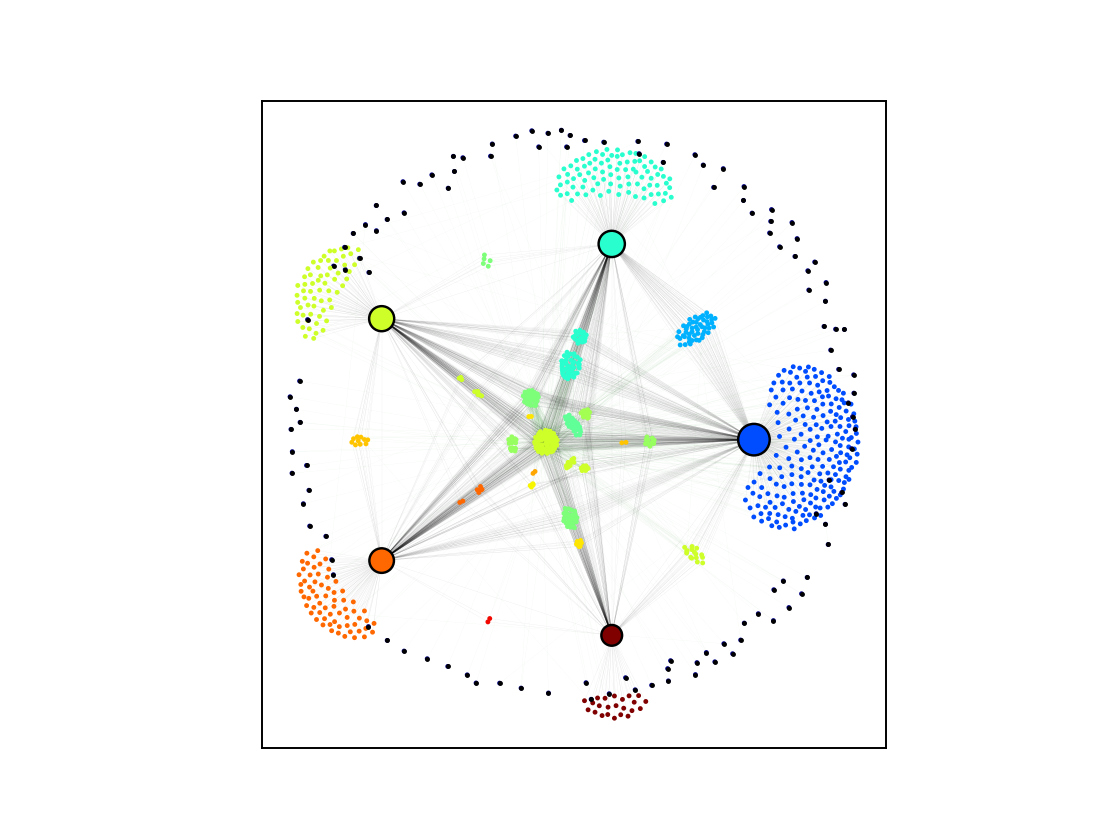

In [19]:
%matplotlib notebook
# draw connections between followers in light green
nx.draw_networkx_edges(g,pos=pos,edgelist=noe,edge_color='g',arrows=True,alpha=0.06,width=0.1)

# draw connections to and from influencers in black
nx.draw_networkx_edges(g,pos=pos,edgelist=yese,edge_color='k',arrows=True,alpha=0.1,width=0.1)

# draw follower nodes with respective colorvalues
nx.draw_networkx_nodes(g,pos=pos,nodelist=idx[:],node_color=col[idx[:]],node_size=1,alpha=1,cmap='jet',vmin=0,vmax=1)

# draw nodes without influencers as small circles (colorvalue 0)
nx.draw_networkx_nodes(g,pos=pos,nodelist=arange(len(g.nodes()))[col==0],node_color='k',node_size=1,alpha=1,cmap='jet',vmin=0,vmax=1)

# draw influencer nodes as large circles in respective color value
nx.draw_networkx_nodes(g,pos=pos,nodelist=idx[:infN], node_size=k[idx[:infN]]**0.8,node_color=col[idx[:infN]],alpha=1,cmap='jet',vmin=0,vmax=1,edgecolors='k')

axis('scaled')
#savefig('SFNetwork_Layout.pdf',dpi=300,bbox_size='tight')
show()

In [242]:
#savefig('SF_5InfluencerNW.pdf',dpi=300,bbox_inches='tight')

In [18]:
len(col[col==0]) # number of nodes without influencers

118

In [19]:
len(noe)+len(yese) # number of edges between followers + number of edges to or from influencers

3304

In [28]:
E = []                 # create edge list for simulations
w = []                 # list of edge weights for simulation
for e in yese :   # for all edges from and to an influencer
    E.append(e)  # invert edge direction (a->b) in networkx notation becomes (b<-a) in the simulation
    w.append(1.0)      # weight of hub edges
    E.append(e[::-1])  # invert edge direction (a->b) in networkx notation becomes (b<-a) in the simulation
    w.append(1.0)      # weight of hub edges
    
for e in noe :         # for interperipheral edges
    E.append(e)  
    w.append(0.01)     # weight of interperipheral edges
    E.append(e[::-1])  
    w.append(0.01)     # weight of interperipheral edges

E=np.array(E)  # make numpy array
w=np.array(w)  # make numpy array
N=len(g.nodes())          # number of nodes

In [29]:
len(E)

6608

In [30]:
N=len(g.nodes())
print(N)

1000


In [31]:
D=np.ones(N)*0.01         # noise in the followers

beta=10                   # influencer coupling intensity

q=2.0                     # influencer effective noise

D[idx[:infN]]=q*beta      # noise in the influencers (q=D/beta)

ohm = np.ones(N)          # frequencies in the peripherals
ohm[idx[:infN]] = beta    # frequencies in the influencers

lam = 0.5                 # coupling strength

$$
    \dot \vartheta_n = \omega_n \left(1 + \frac{\lambda}{\mu_n}\sum_m E_{nm}\sin(\vartheta_m-\vartheta_n-\alpha)\right)\qquad \mu_n = \sum_m E_{nm}
$$

These phase equations are not the same as in the paper but completely mappable as shown in the **Supplemental Information section F** (hence the somewhat odd values for $\Delta\Omega$, $\beta$ and $\Lambda$ in the paper)

In [32]:
mu = bincount(E[:,0],weights=w)  # in-degree weights
mu[mu==0]=1 # saveguard, should not happen (only for zero in-degree)

In [33]:
th=np.random.random(N)*2*pi # phase randomization

In [34]:
steps=200000     # simulation time = steps*skip*dt
skip=20
dt=0.0005

alpha=-0.1        # phase frustration

Rhist=np.zeros(steps)  # record of order parameter

dth=np.zeros(N)        # phase velocity deterministic part

L=len(E)            # number of edges

pctnow=0.0        # percentage counter
pctlast=-1.0


for n in range(steps) :
    Rhist[n] = sqrt(mean(cos(th))**2+mean(sin(th))**2)  # record the mean field
    
    pctnow=floor(100*n/(steps))                   # calculate progress
    if pctnow!=pctlast :
        print(pctnow,' : ',Rhist[n],end='\r')   # print progress and mean field
        pctlast=pctnow

    for i in range(skip) :

        #--------------------------------------------------------------------------------
        # the following is numpy wizardry to avoid the explicit python loop
        # for e in range(L) : dth[E[e,0]]+=w*sin(th[E[e,1]]-th[E[e,0]]-alpha)

        fwd = w*sin(th[E[:,1]]-th[E[:,0]]-alpha)  # calculate the directed edge 
                                                    #coupling contributions
        dth = bincount(E[:,0],weights=fwd)        # add the coupling contributions to the 
                                                    # phase velocities of the corresponding nodes        
                                                  # bincount is equivalent to accumarray in MATLAB
        #--------------------------------------------------------------------------------


        dth*=ohm*lam/mu # normalize coupling terms and multiply with frequency
        dth+=ohm        # add frequency

        # new phases from old phases + deterministic phase velocity + individual noise terms
        th = np.mod(th+dth*dt+sqrt(2*D*dt)*np.random.randn(N),2*pi)
    
print('\ndone.')

99.0  :  0.7880593036275451
done.


In [35]:
import pickle as pl # can save any python object (e.g. plots) to a binary file

<IPython.core.display.Javascript object>


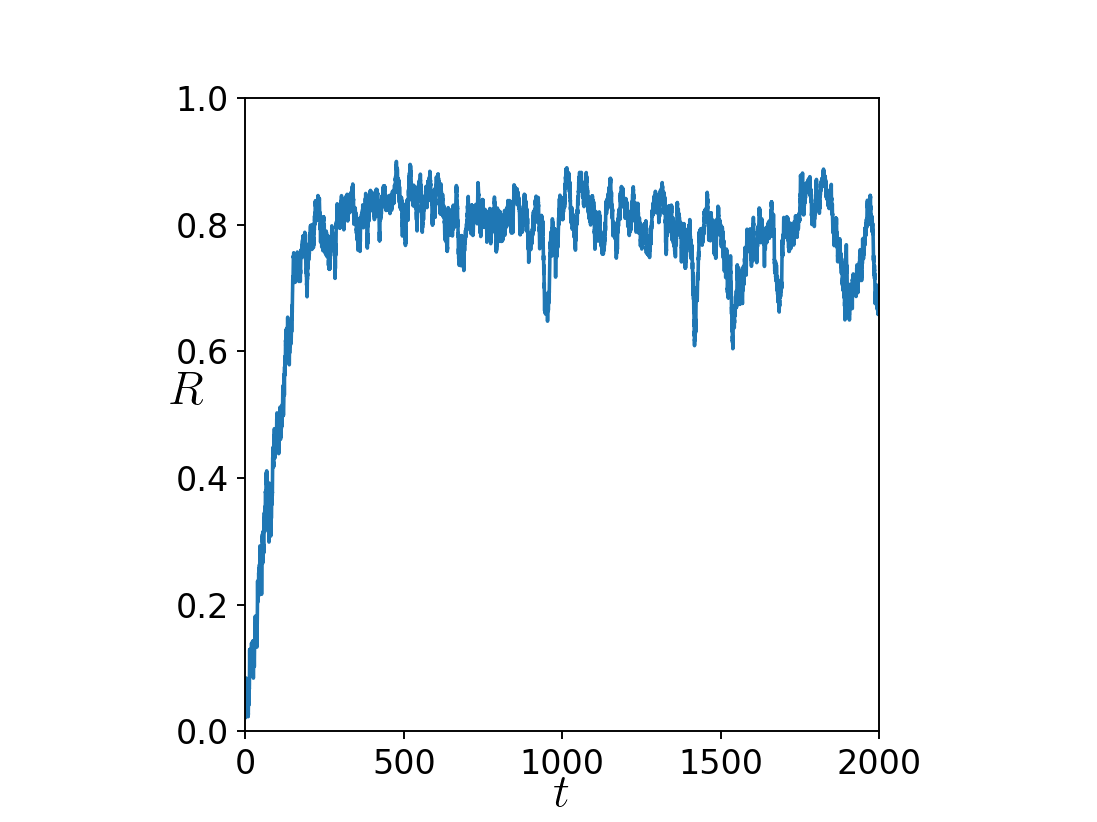

In [37]:
%matplotlib notebook

k=10
plot(dt*skip*arange(0,steps,k),Rhist[::k]) # skip every k points 
                                           # otherwise the plot data is too large

ylim(0,1)
xlim(0,steps*skip*dt)
gca().set_aspect(steps*skip*dt)
xlabel(r'$t$',fontsize=20,usetex=True,labelpad=-3)
ylabel(r'$R$',fontsize=20,usetex=True,labelpad=-5,rotation=0)
gca().tick_params(labelsize=14)

#savefig('SF_5InfluencerNW_q2_0_D001_long.pdf',dpi=300,bbox_inches='tight') # save as pdf

#f=open('SF_5InfluencerNW_q2_0_D001_long.fig','wb')     # save python plot for editing later
#pl.dump(gcf(),f)
#f.close()

show()